In [122]:
import pygraphviz
import igraph
import numpy
import pandas

In [123]:
test_graph = pygraphviz.AGraph("test.dot")
nodes = test_graph.nodes()
edges = test_graph.edges()
test_igraph = igraph.Graph.TupleList(edges)
test_igraph.summary()

'IGRAPH UN-- 13 26 -- \n+ attr: name (v)'

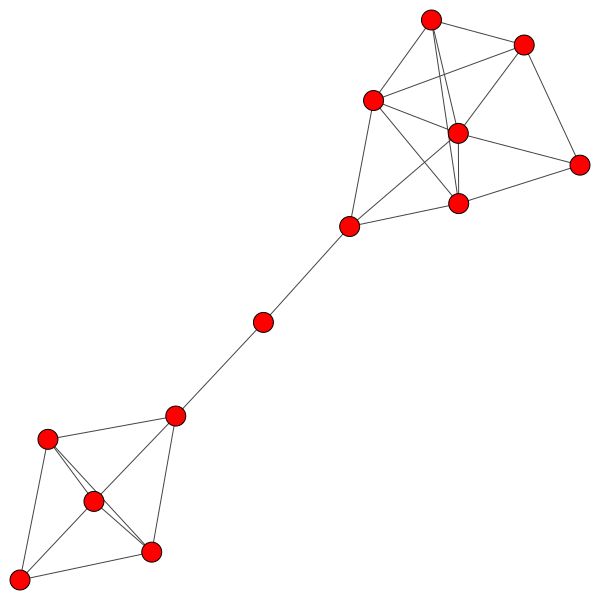

In [124]:
igraph.drawing.plot(test_igraph)

In [15]:
def markov_cluster(graph):
    adj_mat = numpy.matrix(graph.get_adjacency().data)
    N = adj_mat.shape[0]
    

[('1', '2'),
 ('1', '6'),
 ('1', '7'),
 ('2', '7'),
 ('2', '4'),
 ('2', '3'),
 ('6', '7'),
 ('4', '6'),
 ('4', '7'),
 ('4', '5'),
 ('3', '6'),
 ('3', '7'),
 ('3', '4'),
 ('5', '6'),
 ('5', '7'),
 ('5', '8'),
 ('8', '9'),
 ('9', '10'),
 ('9', '12'),
 ('9', '13'),
 ('10', '12'),
 ('10', '13'),
 ('10', '11'),
 ('12', '13'),
 ('11', '12'),
 ('11', '13')]

In [138]:
def markov_cluster(graph):
    adj_mat = numpy.matrix(graph.get_adjacency().data)
    N = adj_mat.shape[0]
    vertex_degrees = numpy.array(graph.degree())
    trans_mat_new = (adj_mat + numpy.diag([1]*N)) * numpy.linalg.inv(numpy.diag(vertex_degrees + 1))
    trans_mat = numpy.zeros([N, N])
    iter_count = 0
    while ((numpy.linalg.norm(trans_mat_new - trans_mat, ord="fro")/
        numpy.linalg.norm(0.5*(trans_mat_new + trans_mat), ord="fro")) > 0.01 and iter_count < 20):
        trans_mat = trans_mat_new
        
        ## TODO: take the power of the matrix to two

        ## TODO: compute the element-wise square of the matrix

        ## compute column sums as "column_sums"
        ## repeat column_sums N times as a row vector, to make a matrix "trans_mat_div"
        
        trans_mat_new = numpy.divide(trans_mat_new, trans_mat_div)
        iter_count += 1
        print("just completed iteration: " + str(iter_count))
    trans_mat_new[trans_mat_new < 1e-10]=0
    trans_mat_new[trans_mat_new > 1e-10]=1
    trans_mat_df = pandas.DataFrame(trans_mat_new.transpose())
    cluster_signatures = trans_mat_df.drop_duplicates()
    cluster_signatures.index=range(cluster_signatures.shape[0])
    return(pandas.merge(cluster_signatures.reset_index(),
                 trans_mat_df.reset_index(),
                 left_on=cluster_signatures.columns.tolist(),
                 right_on=trans_mat_df.columns.tolist())["index_x"].tolist())
    

In [139]:
markov_cluster(test_igraph)

just completed iteration: 1
just completed iteration: 2
just completed iteration: 3
just completed iteration: 4
just completed iteration: 5
just completed iteration: 6
just completed iteration: 7
just completed iteration: 8
just completed iteration: 9


[0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2]